# QM_Assessment_1

In [1]:
#load packages 
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline


## Data

In [2]:
#data
alldata=pd.read_csv('coursework_1_data_2019.csv')

In [3]:
#add columns 
alldata['case_total_p_2018'] = alldata['2018_cases_total']/alldata['2018_pop_total']
alldata['case_total_p_2008'] = alldata['2008_cases_total']/alldata['2008_pop_total']
alldata['change of obesity rate'] = alldata['case_total_p_2018']-alldata['case_total_p_2008']

In [4]:
#region get dummies
data=alldata
name = alldata['local_authority_area']
data=data.drop(['local_authority_area'],axis=1)
data = pd.get_dummies(data)
data=data.set_index(name)
data.head()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
local_authority_area,,,,,,,,,,,,,,,,,,,,,
Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,83890,...,0,0,0,0,0,1,0,0,0,0
Barnet,539,594,773,340435,344062,355955,212,204,292,169060,...,0,0,0,0,0,1,0,0,0,0
Barnsley,360,451,527,226755,244010,257883,148,186,212,110384,...,0,0,0,0,1,0,1,0,0,0
Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,87026,...,0,0,1,0,0,0,0,0,0,1
Bedford,311,327,367,158185,164807,170463,138,145,156,75929,...,0,0,0,0,0,0,0,0,0,1


## Method

### Descriptive Statistic

In [5]:
data['change of obesity rate'].describe()

count                                   152.0000
mean                                      0.0003
std                                       0.0003
min                                      -0.0006
25%                                       0.0002
50%                                       0.0003
75%                                       0.0005
max                                       0.0010
Name: change of obesity rate, dtype: float64

-0.11069410803249503

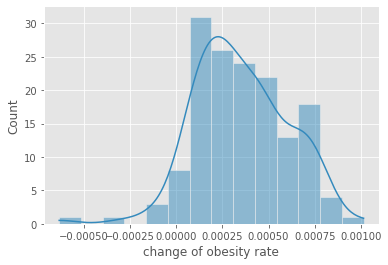

In [6]:
sns.histplot(data=data, x="change of obesity rate", kde=True)
alldata['change of obesity rate'].skew()

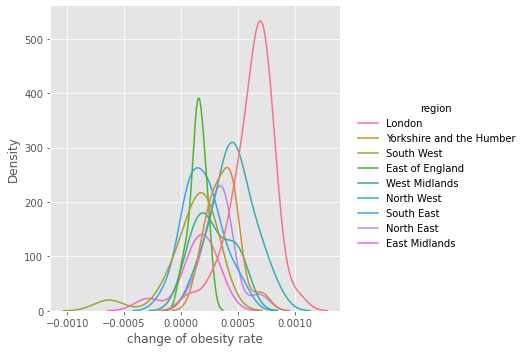

In [7]:
sns.displot(data=alldata, x="change of obesity rate", hue="region", kind="kde")

### Outliers

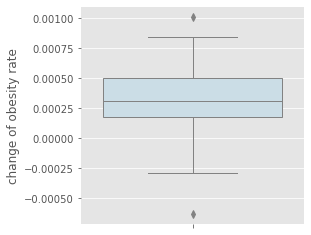

In [8]:
#outlier
plt.subplots(figsize=(4, 4))
sns.boxplot(y="change of obesity rate",
                 data=alldata, linewidth=1,palette="ch:s=.25,rot=-.25")

# Add in points to show each observation
#sns.stripplot(y="change of obesity rate", data=alldata,edgecolor="blue", alpha=.5,
#              size=4, color=".3", linewidth=0)


sns.despine(trim=True, left=True) 

In [9]:
#dealling with outliers 
def detect_outliers(sr):
    q1 = sr.quantile(0.25)
    q3 = sr.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    outliers = sr.loc[(sr < fence_low) | (sr > fence_high)]
    return outliers

In [10]:
detect_outliers(data['change of obesity rate'])

local_authority_area
Hackney                                             0.0010
Isles of Scilly                                    -0.0006
Name: change of obesity rate, dtype: float64

In [11]:
data.loc[['Hackney','Isles of Scilly']]

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,2008_pop_male,...,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and the Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
local_authority_area,,,,,,,,,,,,,,,,,,,,,
Hackney,916,938,1072,214270,205973,202667,275,275,262,104864,...,0,0,0,0,0,1,0,0,0,0
Isles of Scilly,5,1,4,2200,2385,2440,2,0,1,1085,...,0,0,1,0,0,0,0,0,0,1


In [12]:
#delete outliers 
data1 = data.drop(['Hackney','Isles of Scilly'])

In [13]:
#get the new mean
data1['change of obesity rate'].mean()

0.00035159493684639234

### Spearman Corellation Matrix 

In [15]:
#region as variables
x3=data1[['region_East Midlands','region_East of England','region_London','region_North East','region_North West','region_South East','region_South West','region_West Midlands'
]]
# region + case_total_p 
data3=data[['change of obesity rate','region_East Midlands','region_East of England','region_London','region_North East','region_North West','region_South East','region_South West','region_West Midlands','region_Yorkshire and the Humber'
]]

<AxesSubplot:>

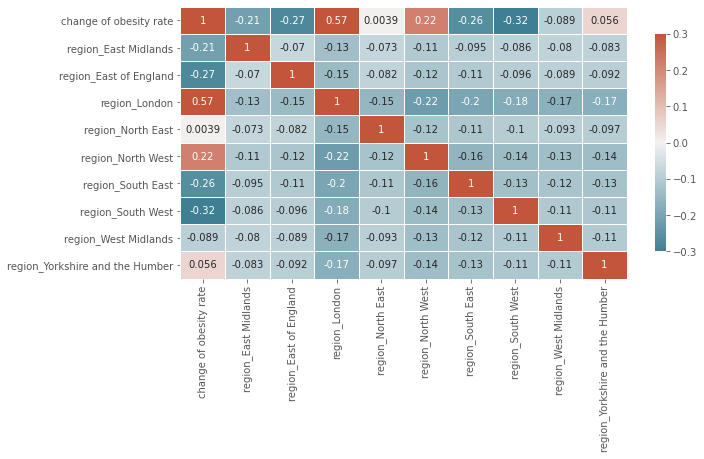

In [18]:
f = plt.figure(figsize=(10, 5))
corr=data3.corr(method="spearman")
a=sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), vmin= -0.3, vmax=.3, center=0, linewidths=.5,annot=True,cbar_kws={"shrink": .8})
a

### Logistic Regression 

In [19]:
#logical regression 
X =x3
y = data1['change of obesity rate'] >= 0.00035
logreg = LogisticRegression()
result=logreg.fit(X, y)
y_pred=logreg.predict(X)

In [20]:
# print the coefficient in the model
print("------------------------------------------")
print("Coefficients:")
coef_dict = {}
intercept= {}
for coef, feat in zip(logreg.coef_.flatten().tolist(),X.columns):
    coef_dict[feat] = coef
    print(feat, ":", round(coef, 4))
print("------------------------------------------")
intercept=result.intercept_
print("Intercept of the model is: " + (str(intercept[0])))
print("------------------------------------------")

acc = sklearn.metrics.accuracy_score(y,y_pred)
print("Accuracy of the model is: " + str(acc))

------------------------------------------
Coefficients:
region_East Midlands : -1.3461
region_East of England : -1.4741
region_London : 2.0634
region_North East : 0.0413
region_North West : 1.5399
region_South East : -0.9468
region_South West : -1.6791
region_West Midlands : -0.1496
------------------------------------------
Intercept of the model is: -0.39191991725061864
------------------------------------------
Accuracy of the model is: 0.8133333333333334


### Confusion Matrix 

The confusion matrix is:


<AxesSubplot:>

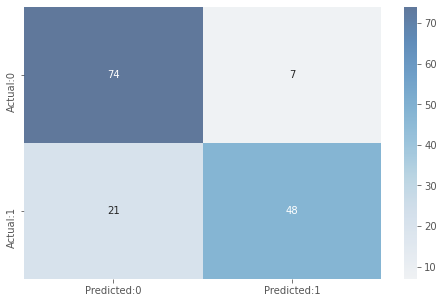

In [21]:
#evaluation: confusion matrix
print("The confusion matrix is:")
cm=confusion_matrix(y,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Blues",alpha=.6)